In [ ]:
### 1. Mount Google Drive ###

from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
### 2. Prepare data ###

!scp '/content/gdrive/My Drive/comvis/data.zip' '/content/data.zip'

!unzip '/content/data.zip' -d '/content/'

Streaming output truncated to the last 5000 lines.
 extracting: /content/test/images/cardboard396_jpg.rf.fb76c5a28057d42886c70e836a5f8660.jpg  
 extracting: /content/test/images/cardboard63_jpg.rf.e8b066437731ba0197b4e8f530317adc.jpg  
 extracting: /content/test/images/cardboard69_jpg.rf.96a2bd9230ba1716c37862930228599c.jpg  
 extracting: /content/test/images/cardboard70_jpg.rf.6658d17c9c675b230ff683f5b1cf0945.jpg  
 extracting: /content/test/images/cardboard73_jpg.rf.7ae241d5654fca1be25ac162c906938a.jpg  
 extracting: /content/test/images/cardboard76_jpg.rf.78841b2438fb79f249e2a464c8587f24.jpg  
 extracting: /content/test/images/glass122_jpg.rf.986be5d9502e97bae857145c3b5172da.jpg  
 extracting: /content/test/images/glass126_jpg.rf.e126b28c100c96edbca2a0dd4b74be48.jpg  
 extracting: /content/test/images/glass128_jpg.rf.f62b1f31ec68d208517ef0fc3d211502.jpg  
 extracting: /content/test/images/glass133_jpg.rf.98c46a035ee9dbe3ef2e11f55370acf6.jpg  
 extracting: /content/test/images/glass1

In [ ]:
### 3. Install packages ###

!git clone https://github.com/WongKinYiu/yolov9
!cd yolov9 && pip install .

Cloning into 'yolov9'...
remote: Enumerating objects: 781, done.
remote: Total 781 (delta 0), reused 0 (delta 0), pack-reused 781 (from 1)
Receiving objects: 100% (781/781), 3.27 MiB | 26.36 MiB/s, done.
Resolving deltas: 100% (331/331), done.
ERROR: Directory '.' is not installable. Neither 'setup.py' nor 'pyproject.toml' found.


In [ ]:
!pip install albumentations==1.4

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.6/123.6 kB 13.7 MB/s eta 0:00:00
  Attempting uninstall: albumentations
    Found existing installation: albumentations 1.4.20
    Uninstalling albumentations-1.4.20:
      Successfully uninstalled albumentations-1.4.20


In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 901.3/901.3 kB 52.2 MB/s eta 0:00:00


In [ ]:
### 4. Train model ###

import os

from ultralytics import YOLO


config_path = '/content/data.yaml'

# # Load a model
model = YOLO("yolov9m.pt")  # load pre trained model

# Use the model
model.train(data=config_path, epochs=30, batch=16)  # train the model


Ultralytics 8.3.51 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov9m.pt, data=/content/data.yaml, epochs=30, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train4, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, 

train: Scanning /content/train/labels.cache... 1762 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1762/1762 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/valid/labels.cache... 503 images, 0 backgrounds, 0 corrupt: 100%|██████████| 503/503 [00:00<?, ?it/s]


Plotting labels to runs/detect/train4/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001, momentum=0.9) with parameter groups 149 weight(decay=0.0), 156 weight(decay=0.0005), 155 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train4
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30      8.51G      0.702      1.963        1.3          8        640: 100%|██████████| 111/111 [01:18<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:10<00:00,  1.54it/s]

                   all        503        506      0.465      0.456      0.267      0.166



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30      8.42G     0.8394      1.643       1.37          5        640: 100%|██████████| 111/111 [01:15<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:08<00:00,  1.83it/s]

                   all        503        506      0.485      0.175        0.1     0.0457



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30      8.41G     0.8653      1.661      1.374          6        640: 100%|██████████| 111/111 [01:14<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:08<00:00,  1.81it/s]

                   all        503        506      0.334      0.416      0.265      0.159



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30      8.45G     0.8383      1.558      1.356          8        640: 100%|██████████| 111/111 [01:13<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:08<00:00,  1.93it/s]

                   all        503        506      0.503      0.534      0.447      0.345



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30      8.41G     0.7926      1.505      1.322          5        640: 100%|██████████| 111/111 [01:14<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:09<00:00,  1.75it/s]

                   all        503        506      0.468       0.53      0.409      0.264



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30      8.39G     0.7593      1.419      1.303          5        640: 100%|██████████| 111/111 [01:13<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:08<00:00,  1.87it/s]

                   all        503        506      0.593      0.547      0.518      0.405



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30      8.42G     0.6973      1.358      1.261          5        640: 100%|██████████| 111/111 [01:14<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:08<00:00,  1.92it/s]

                   all        503        506      0.432      0.488      0.474      0.341



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30      8.45G     0.6825      1.319      1.253          5        640: 100%|██████████| 111/111 [01:13<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:09<00:00,  1.71it/s]

                   all        503        506      0.688       0.56      0.636      0.552



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30      8.41G     0.6556      1.242      1.233          6        640: 100%|██████████| 111/111 [01:13<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:08<00:00,  1.80it/s]

                   all        503        506      0.457      0.686      0.634      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30      8.38G     0.6324      1.218      1.213          5        640: 100%|██████████| 111/111 [01:14<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:08<00:00,  1.95it/s]

                   all        503        506      0.533      0.689      0.667      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30      8.41G     0.6099      1.189      1.205          6        640: 100%|██████████| 111/111 [01:13<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:08<00:00,  1.87it/s]

                   all        503        506      0.538      0.727      0.693      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30      8.44G     0.6019       1.16      1.199          7        640: 100%|██████████| 111/111 [01:13<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:08<00:00,  1.86it/s]

                   all        503        506      0.576      0.734      0.724      0.666



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30       8.4G     0.5837      1.143      1.191          5        640: 100%|██████████| 111/111 [01:13<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:08<00:00,  1.94it/s]

                   all        503        506       0.65      0.689      0.743      0.695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30      8.38G       0.57      1.108      1.172          8        640: 100%|██████████| 111/111 [01:14<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:08<00:00,  1.89it/s]

                   all        503        506      0.666      0.676      0.742      0.692



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30      8.41G     0.5716      1.074      1.175          6        640: 100%|██████████| 111/111 [01:13<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:09<00:00,  1.77it/s]

                   all        503        506      0.615      0.715      0.706      0.654



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30      8.44G      0.529      1.019      1.153          6        640: 100%|██████████| 111/111 [01:13<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:08<00:00,  1.91it/s]

                   all        503        506      0.562      0.678      0.733      0.696



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30      8.42G     0.5232      1.004      1.149          8        640: 100%|██████████| 111/111 [01:13<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:08<00:00,  1.78it/s]

                   all        503        506      0.637      0.746      0.752      0.703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30      8.38G     0.5142      0.963      1.143          6        640: 100%|██████████| 111/111 [01:13<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:08<00:00,  1.88it/s]

                   all        503        506      0.729       0.77      0.815      0.782



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30      8.41G     0.5029     0.9643       1.14          3        640: 100%|██████████| 111/111 [01:14<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:08<00:00,  1.94it/s]

                   all        503        506      0.646      0.838      0.816      0.783



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30      8.45G     0.5028     0.9488      1.135          5        640: 100%|██████████| 111/111 [01:13<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:08<00:00,  1.81it/s]

                   all        503        506      0.669      0.805      0.792       0.76


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30      8.41G     0.2719     0.7298      1.011          2        640: 100%|██████████| 111/111 [01:14<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:08<00:00,  1.91it/s]

                   all        503        506      0.777      0.765      0.834      0.807



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30      8.37G     0.2707     0.7158      1.004          2        640: 100%|██████████| 111/111 [01:12<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:08<00:00,  1.82it/s]

                   all        503        506      0.736      0.793      0.844      0.817



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30      8.41G     0.2498     0.6355      0.995          2        640: 100%|██████████| 111/111 [01:12<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:08<00:00,  1.85it/s]

                   all        503        506      0.709      0.785      0.822      0.797



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30      8.45G      0.246     0.6649     0.9815          5        640: 100%|██████████| 111/111 [01:13<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:08<00:00,  1.83it/s]

                   all        503        506      0.818      0.804      0.872      0.848



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30      8.41G     0.2271     0.6084     0.9631          2        640: 100%|██████████| 111/111 [01:12<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:08<00:00,  1.95it/s]

                   all        503        506      0.802       0.77      0.862      0.836



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30      8.38G     0.2311      0.549     0.9744          2        640: 100%|██████████| 111/111 [01:12<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:08<00:00,  1.84it/s]

                   all        503        506      0.797      0.813      0.881      0.866



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30       8.4G      0.212     0.5473     0.9534          2        640: 100%|██████████| 111/111 [01:12<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:08<00:00,  1.89it/s]

                   all        503        506      0.833      0.816      0.885      0.869



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30      8.44G     0.1987     0.4927     0.9378          2        640: 100%|██████████| 111/111 [01:12<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:08<00:00,  1.93it/s]

                   all        503        506      0.871      0.815      0.915      0.901



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30       8.4G     0.1824     0.4582     0.9315          2        640: 100%|██████████| 111/111 [01:12<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:08<00:00,  1.78it/s]

                   all        503        506      0.861      0.842      0.908      0.893



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30      8.38G     0.1778     0.4345     0.9244          2        640: 100%|██████████| 111/111 [01:12<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:08<00:00,  1.96it/s]

                   all        503        506      0.886      0.835      0.916      0.904



30 epochs completed in 0.705 hours.
Optimizer stripped from runs/detect/train4/weights/last.pt, 40.8MB
Optimizer stripped from runs/detect/train4/weights/best.pt, 40.8MB

Validating runs/detect/train4/weights/best.pt...
Ultralytics 8.3.51 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv9m summary (fused): 374 layers, 20,017,330 parameters, 0 gradients, 76.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:09<00:00,  1.71it/s]


                   all        503        506      0.885      0.835      0.916      0.904
                 Metal         74         74      0.888      0.824      0.925      0.922
                 Paper        125        127      0.926      0.888      0.955      0.944
               Plastic        102        102      0.951      0.753      0.935      0.918
          Random Trash         25         26      0.729      0.731      0.756      0.756
             cardboard         82         82      0.903      0.951      0.974      0.972
                 glass         95         95      0.916      0.863      0.953      0.911
Speed: 0.2ms preprocess, 12.2ms inference, 0.0ms loss, 2.1ms postprocess per image
Results saved to runs/detect/train4


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7eab9da47f40>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
     

In [ ]:
### 5. Download results ###

from google.colab import files


!zip -r /content/runs.zip /content/runs

files.download('/content/runs.zip')


  adding: content/runs/ (stored 0%)
  adding: content/runs/detect/ (stored 0%)
  adding: content/runs/detect/train2/ (stored 0%)
  adding: content/runs/detect/train2/labels_correlogram.jpg (deflated 44%)
  adding: content/runs/detect/train2/events.out.tfevents.1734476914.6ab9a0234477.624.1 (deflated 9%)
  adding: content/runs/detect/train2/weights/ (stored 0%)
  adding: content/runs/detect/train2/args.yaml (deflated 53%)
  adding: content/runs/detect/train2/labels.jpg (deflated 25%)
  adding: content/runs/detect/train3/ (stored 0%)
  adding: content/runs/detect/train3/events.out.tfevents.1734476939.6ab9a0234477.624.2 (deflated 9%)
  adding: content/runs/detect/train3/weights/ (stored 0%)
  adding: content/runs/detect/train3/args.yaml (deflated 53%)
  adding: content/runs/detect/train/ (stored 0%)
  adding: content/runs/detect/train/labels_correlogram.jpg (deflated 44%)
  adding: content/runs/detect/train/train_batch1.jpg (deflated 8%)
  adding: content/runs/detect/train/events.out.tfev

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

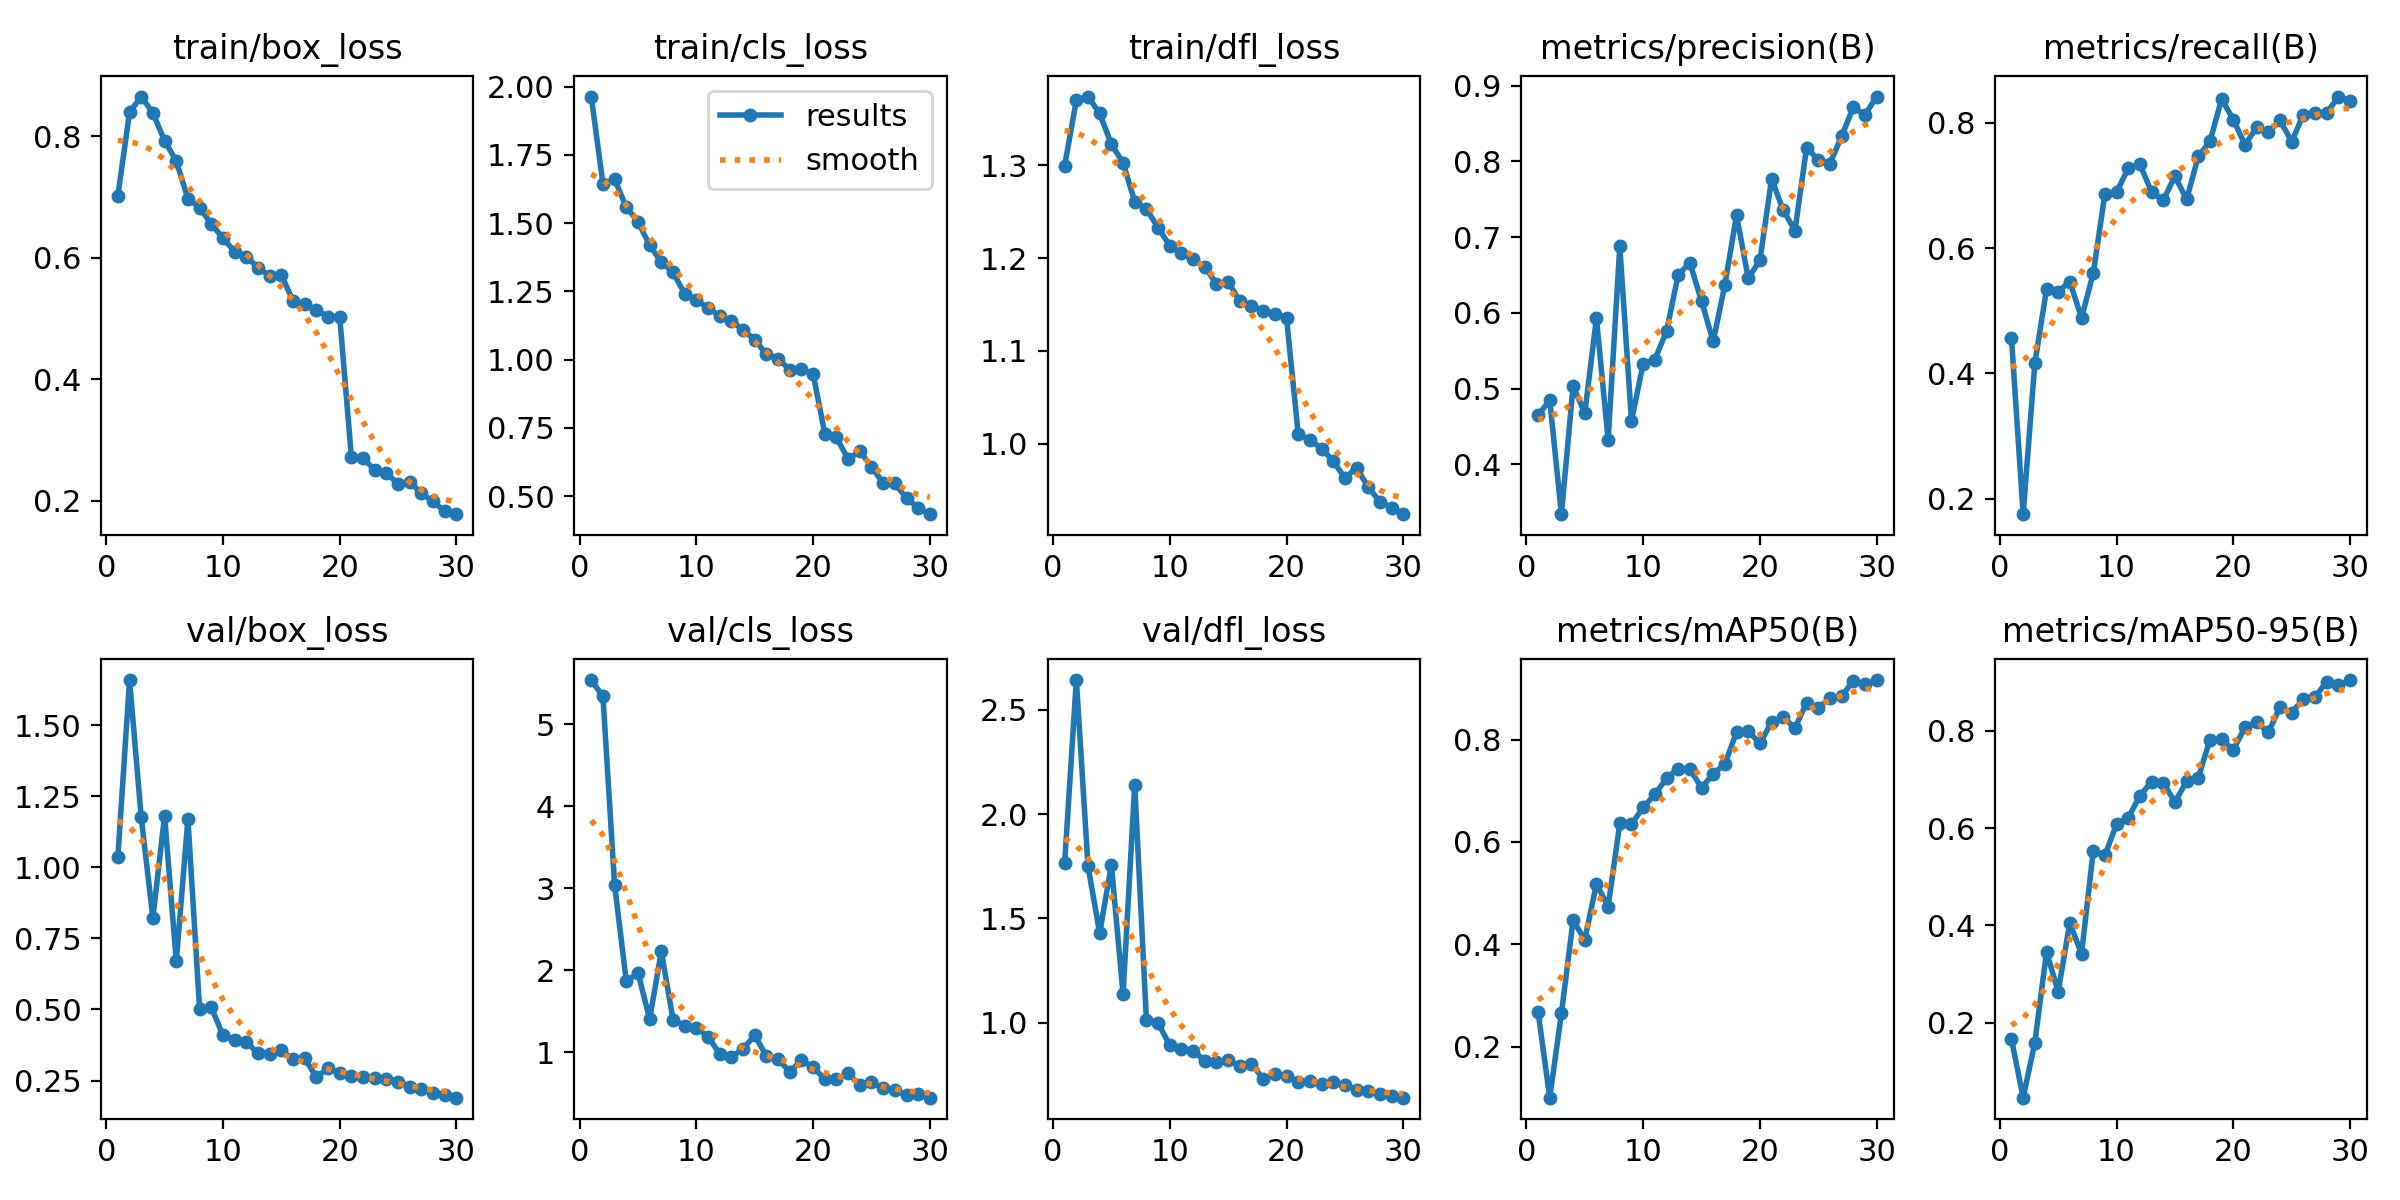

In [ ]:
from IPython.display import Image
Image("/content/content/runs/detect/train/results.png")


image 1/1 /content/gambartest1.jpg: 640x640 1 Paper, 40.3ms
Speed: 2.0ms preprocess, 40.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


array([[[237, 234, 230],
        [236, 233, 229],
        [236, 233, 229],
        ...,
        [226, 226, 226],
        [225, 225, 225],
        [224, 224, 224]],

       [[237, 234, 230],
        [236, 233, 229],
        [236, 233, 229],
        ...,
        [226, 226, 226],
        [225, 225, 225],
        [224, 224, 224]],

       [[236, 233, 229],
        [236, 233, 229],
        [235, 232, 228],
        ...,
        [225, 225, 225],
        [224, 224, 224],
        [224, 224, 224]],

       ...,

       [[225, 227, 227],
        [225, 227, 227],
        [225, 227, 227],
        ...,
        [187, 189, 190],
        [187, 189, 190],
        [187, 189, 190]],

       [[225, 227, 227],
        [225, 227, 227],
        [225, 227, 227],
        ...,
        [187, 189, 190],
        [187, 189, 190],
        [187, 189, 190]],

       [[225, 227, 227],
        [225, 227, 227],
        [225, 227, 227],
        ...,
        [187, 189, 190],
        [187, 189, 190],
        [187, 189, 190]]], dtype=uint8)
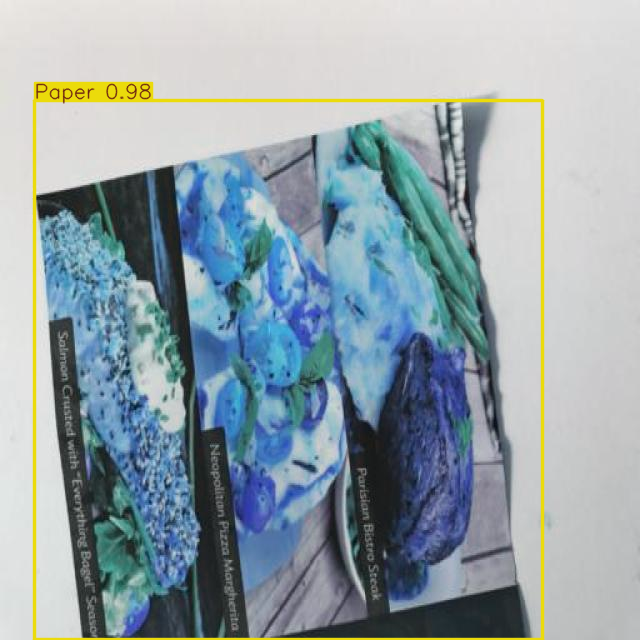

In [ ]:
from ultralytics import YOLO
import os

# Load the model
model_path = '/content/content/runs/detect/train4/weights/best.pt'
assert os.path.exists(model_path), f"Model file {model_path} tidak ditemukan!"
my_new_model = YOLO(model_path)

# Image path
new_image = '/content/gambartest1.jpg'
assert os.path.exists(new_image), f"File {new_image} tidak ditemukan!"

# Run prediction
new_results = my_new_model.predict(source=new_image, conf=0.1)


# Optional: Visualize predictions
new_results[0].plot()


image 1/1 /content/gambartest2.jpg: 640x640 1 glass, 40.3ms
Speed: 2.2ms preprocess, 40.3ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


array([[[221, 232, 240],
        [221, 232, 240],
        [221, 232, 240],
        ...,
        [219, 230, 238],
        [219, 230, 238],
        [219, 230, 238]],

       [[221, 232, 240],
        [221, 232, 240],
        [221, 232, 240],
        ...,
        [219, 230, 238],
        [219, 230, 238],
        [219, 230, 238]],

       [[221, 232, 240],
        [221, 232, 240],
        [221, 232, 240],
        ...,
        [219, 230, 238],
        [219, 230, 238],
        [219, 230, 238]],

       ...,

       [[165, 169, 174],
        [166, 170, 175],
        [166, 170, 175],
        ...,
        [166, 169, 173],
        [166, 169, 173],
        [166, 169, 173]],

       [[165, 169, 174],
        [165, 169, 174],
        [166, 170, 175],
        ...,
        [166, 169, 173],
        [166, 169, 173],
        [166, 169, 173]],

       [[165, 169, 174],
        [165, 169, 174],
        [165, 169, 174],
        ...,
        [166, 169, 173],
        [166, 169, 173],
        [166, 169, 173]]], dtype=uint8)
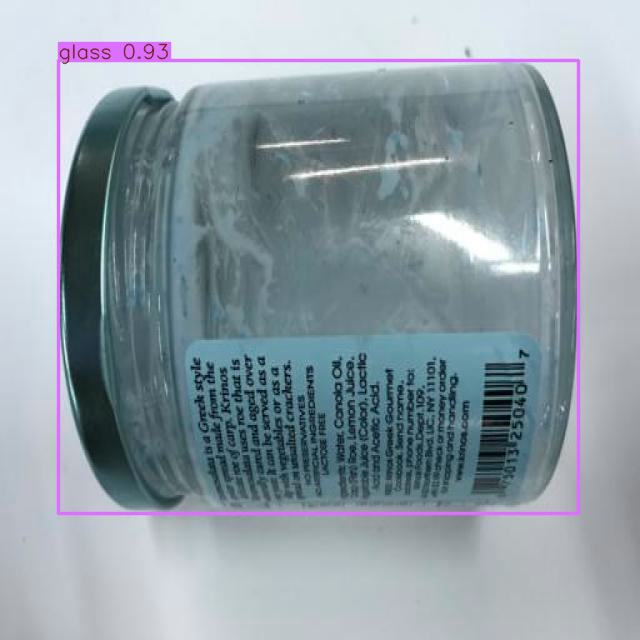

In [ ]:
from ultralytics import YOLO
import os

# Load the model
model_path = '/content/content/runs/detect/train4/weights/best.pt'
assert os.path.exists(model_path), f"Model file {model_path} tidak ditemukan!"
my_new_model = YOLO(model_path)

# Image path
new_image = '/content/gambartest2.jpg'
assert os.path.exists(new_image), f"File {new_image} tidak ditemukan!"

# Run prediction
new_results = my_new_model.predict(source=new_image, conf=0.1)


# Optional: Visualize predictions
new_results[0].plot()


image 1/1 /content/gambartest3.jpg: 640x640 1 Metal, 40.3ms
Speed: 2.2ms preprocess, 40.3ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


array([[[174, 169, 171],
        [174, 169, 171],
        [174, 169, 171],
        ...,
        [135, 130, 131],
        [135, 130, 131],
        [135, 130, 131]],

       [[174, 169, 171],
        [174, 169, 171],
        [174, 169, 171],
        ...,
        [135, 130, 131],
        [135, 130, 131],
        [135, 130, 131]],

       [[174, 169, 171],
        [174, 169, 171],
        [174, 169, 171],
        ...,
        [135, 130, 131],
        [135, 130, 131],
        [135, 130, 131]],

       ...,

       [[190, 185, 186],
        [190, 185, 186],
        [190, 185, 186],
        ...,
        [163, 158, 159],
        [163, 158, 159],
        [163, 158, 159]],

       [[190, 185, 186],
        [190, 185, 186],
        [190, 185, 186],
        ...,
        [163, 158, 159],
        [163, 158, 159],
        [163, 158, 159]],

       [[190, 185, 186],
        [190, 185, 186],
        [190, 185, 186],
        ...,
        [163, 158, 159],
        [163, 158, 159],
        [163, 158, 159]]], dtype=uint8)
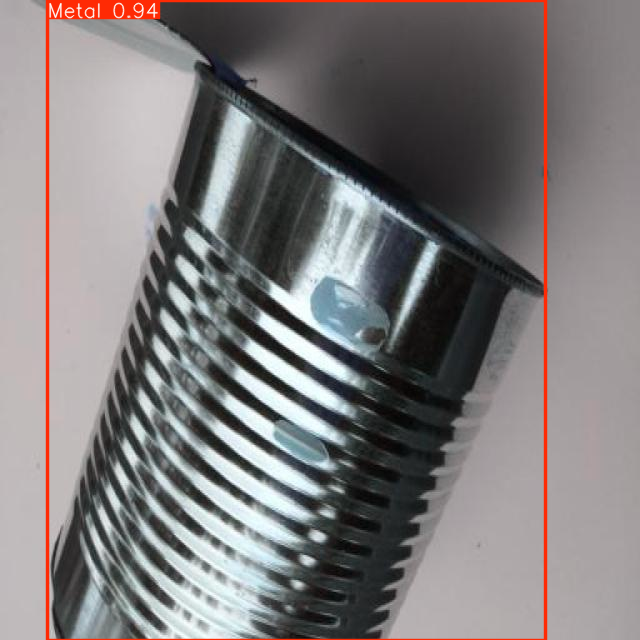

In [ ]:
from ultralytics import YOLO
import os

# Load the model
model_path = '/content/content/runs/detect/train4/weights/best.pt'
assert os.path.exists(model_path), f"Model file {model_path} tidak ditemukan!"
my_new_model = YOLO(model_path)

# Image path
new_image = '/content/gambartest3.jpg'
assert os.path.exists(new_image), f"File {new_image} tidak ditemukan!"

# Run prediction
new_results = my_new_model.predict(source=new_image, conf=0.1)


# Optional: Visualize predictions
new_results[0].plot()


image 1/1 /content/gambartest6.jpg: 640x640 1 cardboard, 40.3ms
Speed: 1.9ms preprocess, 40.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


array([[[255, 252, 248],
        [255, 252, 248],
        [255, 252, 248],
        ...,
        [249, 248, 244],
        [249, 248, 244],
        [249, 248, 244]],

       [[255, 252, 248],
        [255, 252, 248],
        [255, 252, 248],
        ...,
        [249, 248, 244],
        [249, 248, 244],
        [249, 248, 244]],

       [[255, 252, 248],
        [255, 252, 248],
        [255, 252, 248],
        ...,
        [249, 248, 244],
        [249, 248, 244],
        [249, 248, 244]],

       ...,

       [[246, 243, 238],
        [246, 243, 238],
        [246, 243, 238],
        ...,
        [236, 233, 228],
        [236, 233, 228],
        [236, 233, 228]],

       [[246, 243, 238],
        [246, 243, 238],
        [246, 243, 238],
        ...,
        [236, 233, 228],
        [236, 233, 228],
        [236, 233, 228]],

       [[246, 243, 238],
        [246, 243, 238],
        [246, 243, 238],
        ...,
        [236, 233, 228],
        [236, 233, 228],
        [236, 233, 228]]], dtype=uint8)
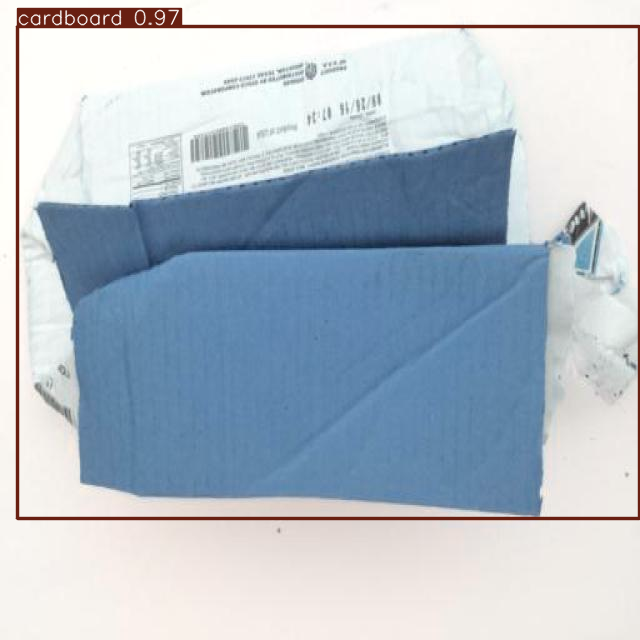

In [ ]:
from ultralytics import YOLO
import os

# Load the model
model_path = '/content/content/runs/detect/train4/weights/best.pt'
assert os.path.exists(model_path), f"Model file {model_path} tidak ditemukan!"
my_new_model = YOLO(model_path)

# Image path
new_image = '/content/gambartest4.jpg'
assert os.path.exists(new_image), f"File {new_image} tidak ditemukan!"

# Run prediction
new_results = my_new_model.predict(source=new_image, conf=0.1)


# Optional: Visualize predictions
new_results[0].plot()


image 1/1 /content/gambartest5.jpg: 640x640 1 Plastic, 40.3ms
Speed: 1.6ms preprocess, 40.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


array([[[230, 216, 217],
        [230, 216, 217],
        [230, 216, 217],
        ...,
        [148, 142, 143],
        [147, 141, 142],
        [147, 141, 142]],

       [[230, 216, 217],
        [230, 216, 217],
        [230, 216, 217],
        ...,
        [148, 142, 143],
        [147, 141, 142],
        [147, 141, 142]],

       [[230, 216, 217],
        [230, 216, 217],
        [230, 216, 217],
        ...,
        [148, 142, 143],
        [147, 141, 142],
        [147, 141, 142]],

       ...,

       [[217, 204, 202],
        [217, 204, 202],
        [217, 204, 202],
        ...,
        [164, 159, 160],
        [164, 159, 160],
        [164, 159, 160]],

       [[217, 204, 202],
        [217, 204, 202],
        [217, 204, 202],
        ...,
        [164, 159, 160],
        [164, 159, 160],
        [164, 159, 160]],

       [[217, 204, 202],
        [217, 204, 202],
        [217, 204, 202],
        ...,
        [164, 159, 160],
        [164, 159, 160],
        [164, 159, 160]]], dtype=uint8)
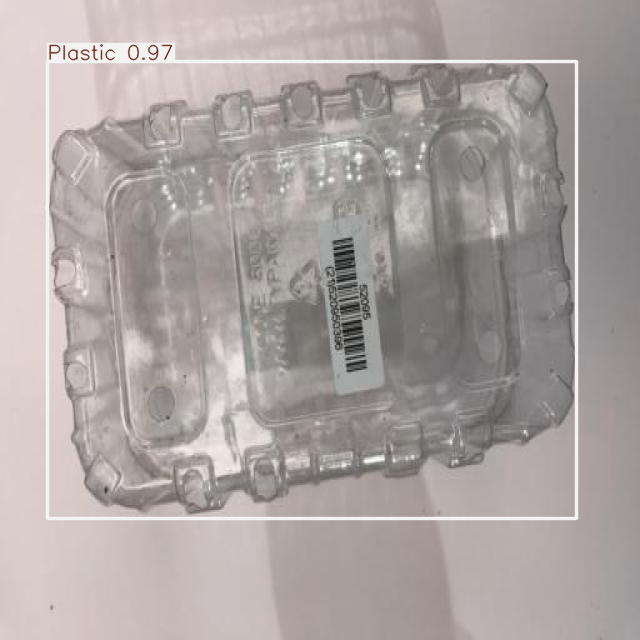

In [ ]:
from ultralytics import YOLO
import os

# Load the model
model_path = '/content/content/runs/detect/train4/weights/best.pt'
assert os.path.exists(model_path), f"Model file {model_path} tidak ditemukan!"
my_new_model = YOLO(model_path)

# Image path
new_image = '/content/gambartest5.jpg'
assert os.path.exists(new_image), f"File {new_image} tidak ditemukan!"

# Run prediction
new_results = my_new_model.predict(source=new_image, conf=0.1)


# Optional: Visualize predictions
new_results[0].plot()